# Q. Hierarchical, Kmeans & DBSCAN Clustering
* Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Crime = pd.read_csv('crime_data.csv')
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
Crime.shape

(50, 5)

In [5]:
Crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
Crime.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Maryland,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [7]:
Crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
Crime = Crime.drop(['Unnamed: 0'],axis=1)
Crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [9]:
Crime['Assault'] = Crime.Murder.astype('float')
Crime['UrbanPop']   = Crime.Rape.astype('float')

In [10]:
Crime.dtypes

Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

In [11]:
scaler = StandardScaler()
Crime_scaler = scaler.fit_transform(Crime)

In [12]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,5):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(Crime)
    wcss.append(kmeans.inertia_)

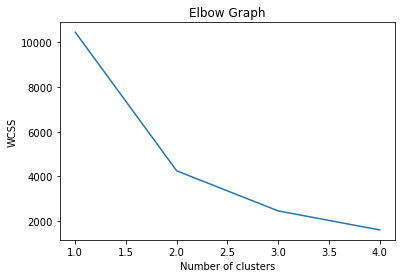

In [13]:
plt.plot(range(1,5),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### K-Means using K=2

In [14]:
clusters_4=KMeans(2,random_state=30).fit(Crime_scaler)
clusters_4

KMeans(n_clusters=2, random_state=30)

In [15]:
clusters_4.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [16]:
Crime=Crime.copy()
Crime['clusters_4_id']=clusters_4.labels_
Crime

,Murder,Assault,UrbanPop,Rape,clusters_4_id
0,13.2,13.2,21.2,21.2,1
1,10.0,10.0,44.5,44.5,1
2,8.1,8.1,31.0,31.0,1
3,8.8,8.8,19.5,19.5,0
4,9.0,9.0,40.6,40.6,1
5,7.9,7.9,38.7,38.7,1
6,3.3,3.3,11.1,11.1,0
7,5.9,5.9,15.8,15.8,0
8,15.4,15.4,31.9,31.9,1
9,17.4,17.4,25.8,25.8,1


In [17]:
clusters_4.cluster_centers_

array([[-0.67675778, -0.67675778, -0.57037591, -0.57037591],
       [ 1.01513667,  1.01513667,  0.85556386,  0.85556386]])

In [18]:
Crime.groupby('clusters_4_id').agg(['mean']).reset_index()

,clusters_4_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,4.870,15.943333,15.943333
1,1,12.165,12.165,29.165000,29.165000


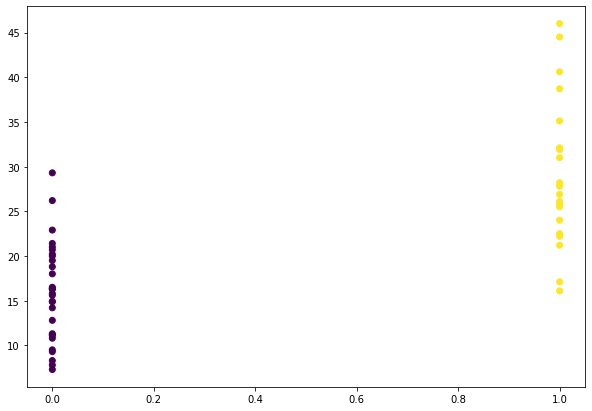

In [19]:
plt.figure(figsize=(10, 7))  
plt.scatter(Crime['clusters_4_id'],Crime['UrbanPop'], c=clusters_4.labels_)

### K-Means using K=3

In [20]:
clusters_5=KMeans(3,random_state=30).fit(Crime_scaler)
clusters_5

KMeans(n_clusters=3, random_state=30)

In [21]:
clusters_5.labels_

array([2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0])

In [22]:
Crime= Crime.copy()
Crime['clusters_5_id']=clusters_5.labels_
Crime

,Murder,Assault,UrbanPop,Rape,clusters_4_id,clusters_5_id
0,13.2,13.2,21.2,21.2,1,2
1,10.0,10.0,44.5,44.5,1,1
2,8.1,8.1,31.0,31.0,1,1
3,8.8,8.8,19.5,19.5,0,0
4,9.0,9.0,40.6,40.6,1,1
5,7.9,7.9,38.7,38.7,1,1
6,3.3,3.3,11.1,11.1,0,0
7,5.9,5.9,15.8,15.8,0,0
8,15.4,15.4,31.9,31.9,1,2
9,17.4,17.4,25.8,25.8,1,2


In [23]:
clusters_5.cluster_centers_

array([[-0.6769977 , -0.6769977 , -0.6200483 , -0.6200483 ],
       [ 0.37386345,  0.37386345,  1.61068462,  1.61068462],
       [ 1.3556802 ,  1.3556802 ,  0.29043659,  0.29043659]])

In [24]:
Crime.groupby('clusters_5_id').agg(['mean']).reset_index()

,clusters_5_id,Murder,Assault,UrbanPop,Rape,clusters_4_id
,,mean,mean,mean,mean,mean
0,0,4.868966,4.868966,15.482759,15.482759,0.000000
1,1,9.400000,9.400000,36.166667,36.166667,0.888889
2,2,13.633333,13.633333,23.925000,23.925000,1.000000


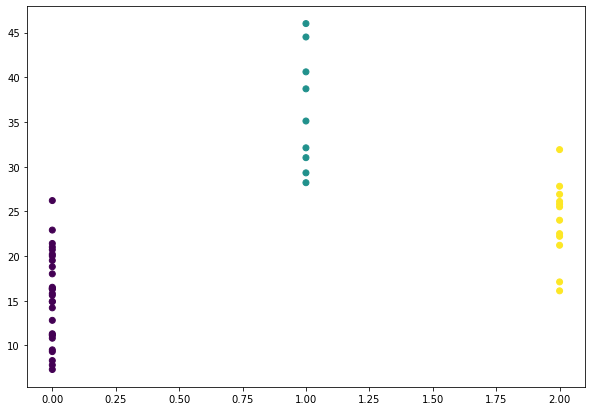

In [25]:
plt.figure(figsize=(10, 7))  
plt.scatter(Crime['clusters_5_id'],Crime['UrbanPop'], c=clusters_5.labels_)

# DBSCAN 

In [26]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(Crime_scaler)

DBSCAN(eps=0.8, min_samples=6)

In [27]:
dbscan.labels_

array([ 1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0,  1,  0,  0,  0,  0,
       -1,  0,  1,  0, -1,  0, -1,  1,  0,  0, -1,  0,  0,  1,  1, -1,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  1, -1,  0,  0, -1,  0,  0,  0],
      dtype=int64)

In [28]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,1
1,-1
2,-1
3,0
4,-1
5,-1
6,0
7,0
8,-1
9,-1


In [29]:
Crime = pd.concat([Crime,cl],axis=1)
Crime

,Murder,Assault,UrbanPop,Rape,clusters_4_id,clusters_5_id,cluster
0,13.2,13.2,21.2,21.2,1,2,1
1,10.0,10.0,44.5,44.5,1,1,-1
2,8.1,8.1,31.0,31.0,1,1,-1
3,8.8,8.8,19.5,19.5,0,0,0
4,9.0,9.0,40.6,40.6,1,1,-1
5,7.9,7.9,38.7,38.7,1,1,-1
6,3.3,3.3,11.1,11.1,0,0,0
7,5.9,5.9,15.8,15.8,0,0,0
8,15.4,15.4,31.9,31.9,1,2,-1
9,17.4,17.4,25.8,25.8,1,2,-1


In [30]:
Crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape,clusters_4_id,clusters_5_id
,,mean,mean,mean,mean,mean,mean
0,-1,10.621429,10.621429,30.528571,30.528571,0.785714,1.214286
1,0,4.962963,4.962963,14.811111,14.811111,0.000000,0.000000
2,1,11.855556,11.855556,26.033333,26.033333,1.000000,1.777778


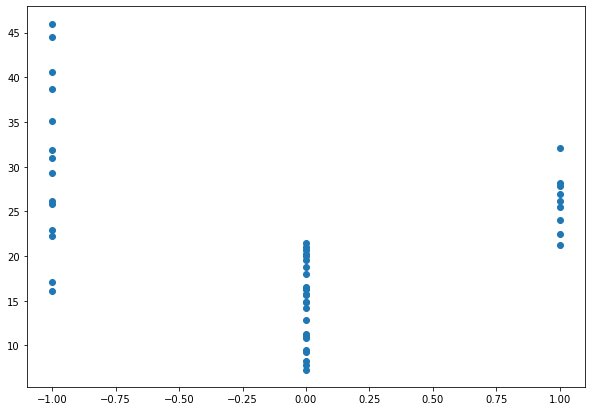

In [31]:
plt.figure(figsize=(10, 7))  
plt.scatter(Crime['cluster'],Crime['UrbanPop'])

# Hierarchical

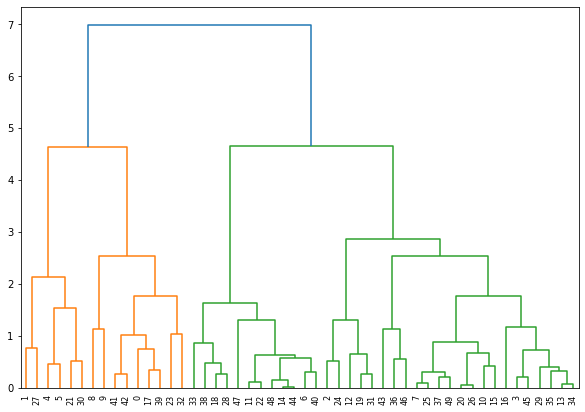

In [32]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(Crime_scaler,'complete',))
plt.show()

In [33]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [34]:
y=pd.DataFrame(hclusters.fit_predict(Crime_scaler),columns=['cluster'])
y['cluster'].value_counts()

0    18
3    12
4     9
1     7
2     4
Name: cluster, dtype: int64

In [35]:
Crime['cluster']=hclusters.labels_
Crime

,Murder,Assault,UrbanPop,Rape,clusters_4_id,clusters_5_id,cluster
0,13.2,13.2,21.2,21.2,1,2,1
1,10.0,10.0,44.5,44.5,1,1,2
2,8.1,8.1,31.0,31.0,1,1,4
3,8.8,8.8,19.5,19.5,0,0,0
4,9.0,9.0,40.6,40.6,1,1,2
5,7.9,7.9,38.7,38.7,1,1,2
6,3.3,3.3,11.1,11.1,0,0,3
7,5.9,5.9,15.8,15.8,0,0,0
8,15.4,15.4,31.9,31.9,1,2,1
9,17.4,17.4,25.8,25.8,1,2,1


In [36]:
Crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape,clusters_4_id,clusters_5_id
,,mean,mean,mean,mean,mean,mean
0,0,6.255556,6.255556,19.433333,19.433333,0,0.055556
1,1,14.985714,14.985714,22.400000,22.400000,1,2.000000
2,2,9.775000,9.775000,42.450000,42.450000,1,1.000000
3,3,2.791667,2.791667,10.708333,10.708333,0,0.000000
4,4,11.033333,11.033333,28.522222,28.522222,1,1.555556


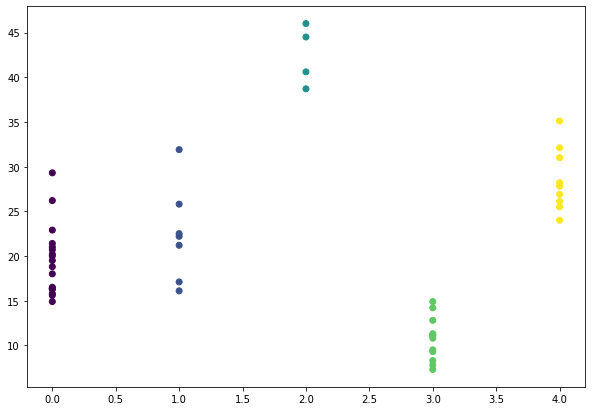

In [37]:
plt.figure(figsize=(10, 7))  
plt.scatter(Crime['cluster'],Crime['UrbanPop'], c=hclusters.labels_)